# Gráfico de linha mais avançado
- Agora que abordamos muitos conceitos básicos com o gráfico de linha, agora vamos fazer algumas customizações mais avançadas
- Vamos carregar os dados de um `.csv` e realizar algumas customizações nos plots

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

- **Carregando os dados:**

In [2]:
df = pd.read_csv("assets/salesman_pivot.csv")
df

,Bob,Dave,Jeb,Oscar,Ronald
0,7172,1864,4430,5250,2639
1,6362,8278,8026,8661,4951
2,5982,4226,5188,7075,2703
3,7917,3868,3144,2524,4258
4,7837,2287,938,2793,7771
...,...,...,...,...,...
361,2045,2843,6666,835,2981
362,100,8888,1243,3073,6129
363,4115,9490,3498,6424,7662
364,2577,3594,8858,7088,2570


In [3]:
bob = df["Bob"].rolling(10).sum().dropna()
dave = df["Dave"].rolling(10).sum().dropna()

## Criando o plot
- Vamos criar um plot para mostrar a diferença de vendas entre `Bob` e `Dave`

Text(0, 0.5, 'Reais')

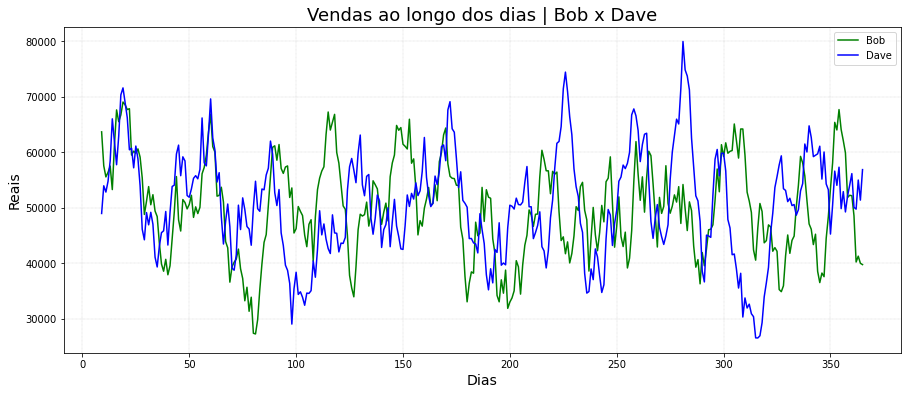

In [4]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(bob, color="g", label="Bob")
ax.plot(dave, color="b", label="Dave")
ax.legend()
ax.grid(True, color='gray', linestyle='dotted', linewidth=0.3)
ax.set_title('Vendas ao longo dos dias | Bob x Dave', size=18)
ax.set_xlabel('Dias', size=14)
ax.set_ylabel('Reais', size=14)

### Customizando os ticks

In [5]:
from matplotlib.ticker import StrMethodFormatter

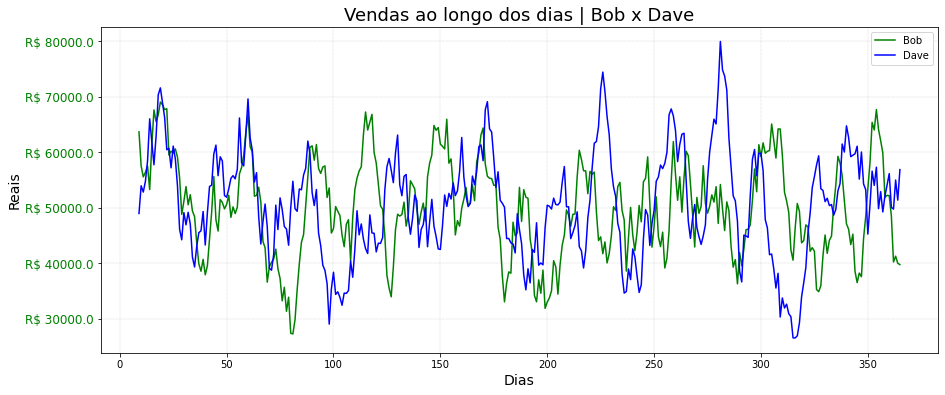

In [6]:
ax.tick_params(axis='y', labelsize=12, labelcolor='green') # alterando a cor dos ticks do eixo Y

fmt = StrMethodFormatter("R$ {x}") # criando um formatador para inserir R$ no eixo Y
ax.yaxis.set_major_formatter(fmt) # aplicando o formatodor

fig

### Adicionando marcadores para destacar os dias

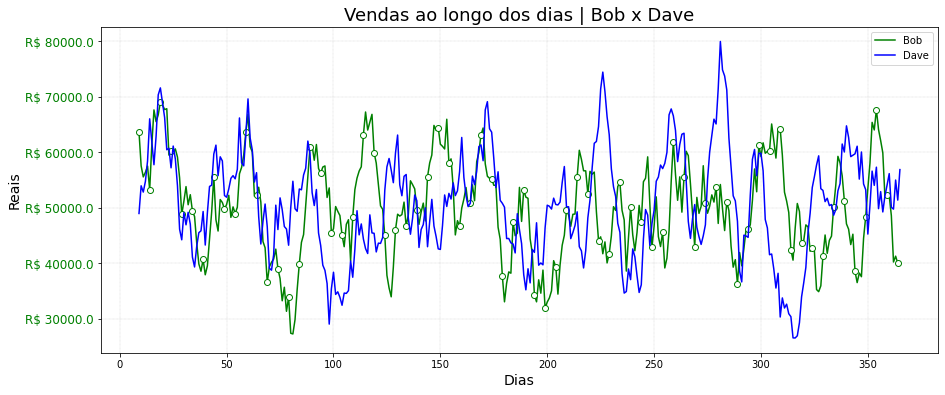

In [7]:
bob_curve = ax.lines[0] # Selecionando a curva do bob de dentro das linhas do Axes
bob_curve.set_marker('o') # Adicionando um marcador em formato de bolinha
bob_curve.set_markevery(5) # Amostrando o marcador para criar a bolinha a cada 5 dias
bob_curve.set_markerfacecolor('white') # Fazendo a bolinha ficar branca
fig

- Fazendo o mesmo para `Dave`

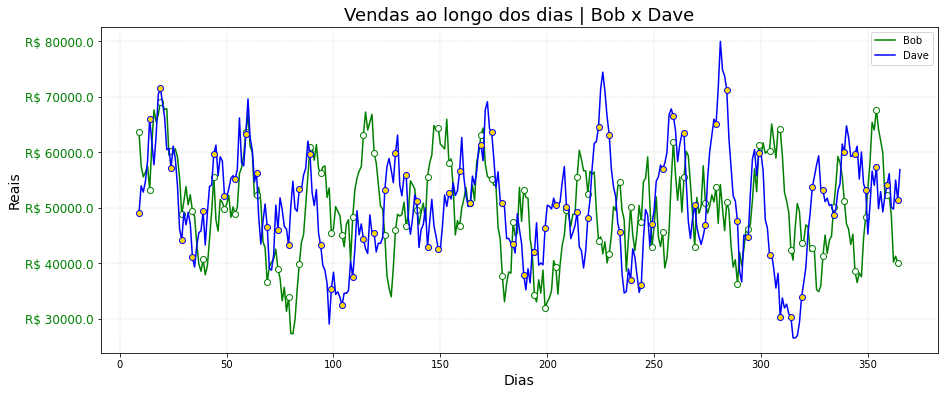

In [8]:
dave_curve = ax.lines[1] # Selecionando a curva do bob de dentro das linhas do Axes
dave_curve.set_marker('o') # Adicionando um marcador em formato de bolinha
dave_curve.set_markevery(5) # Amostrando o marcador para criar a bolinha a cada 5 dias
dave_curve.set_markerfacecolor('gold') # Fazendo a bolinha ficar branca
fig

- Lembre-se que alternativamente poderiamos fazer tudo isso usando `set()`
    - **Ex:** `bob_curve.set(marker='o', markevery=5, markerfacecolor='white)`
    
    
### Legenda    
- Vamos aplicar a legenda denovo para ela levar em consideração os marcadores

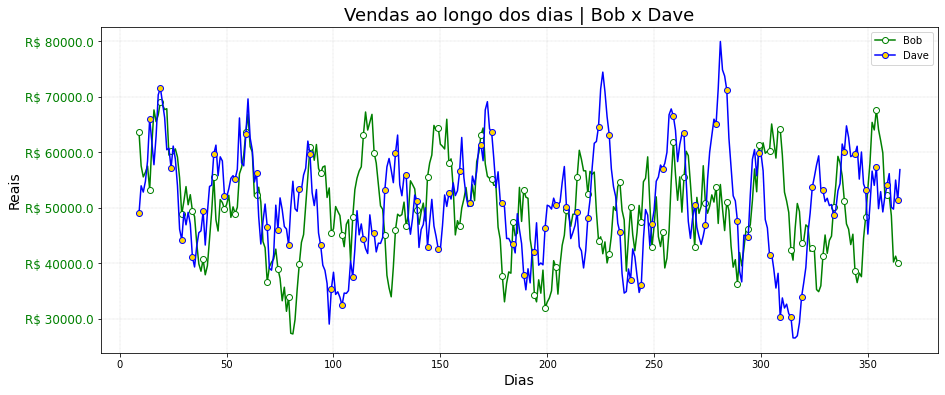

In [9]:
ax.legend()
fig

- Vamos dar uma pequena modificada

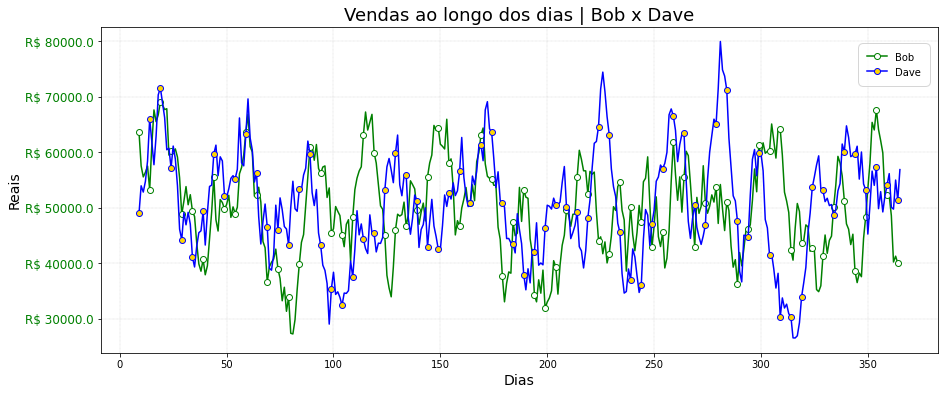

In [10]:
ax.legend_.set_bbox_to_anchor([0.99, 0.95]) # movendo a posição da legenda
ax.legend_.legendPatch.set_boxstyle('round, pad=0.5') # deixando as bordas arredondadas
fig

### Criando linhas verticas e horizontais
- Vamos supor que desejamos traçar uma linha horizontal que representa a média de vendas para ambos os vendedores

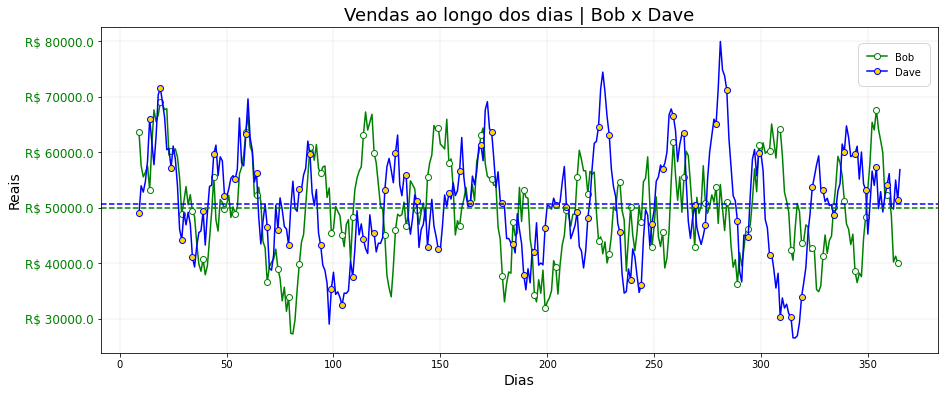

In [11]:
avg_bob = bob.mean()
avg_dave = dave.mean()

ax.axhline(avg_bob, color='green', ls='dashed') # criando a linha horizontal para bob
ax.axhline(avg_dave, color='blue', ls='dashed') # criando a linha horizontal para dave

fig

- Vamos criar uma linha vertical para indicar o dia de venda máxima

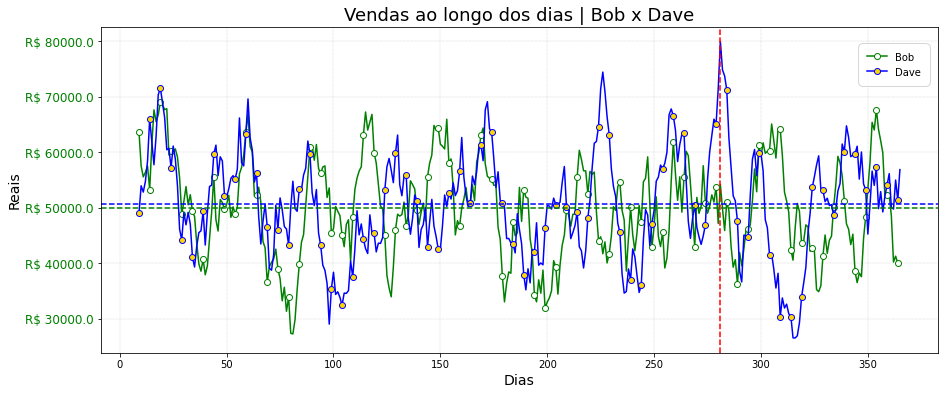

In [12]:
day_max = dave.idxmax() if dave.max() > bob.max() else bob.idxmax()
val_day_max = max([dave.max(), bob.max()])
ax.axvline(day_max, color='red', ls='dashed') # criando a linha vertical para o dia de venda maxima
fig

### Anotações
- Vamos adicionar algumas anotações para melhorar a visualização do valor máximo

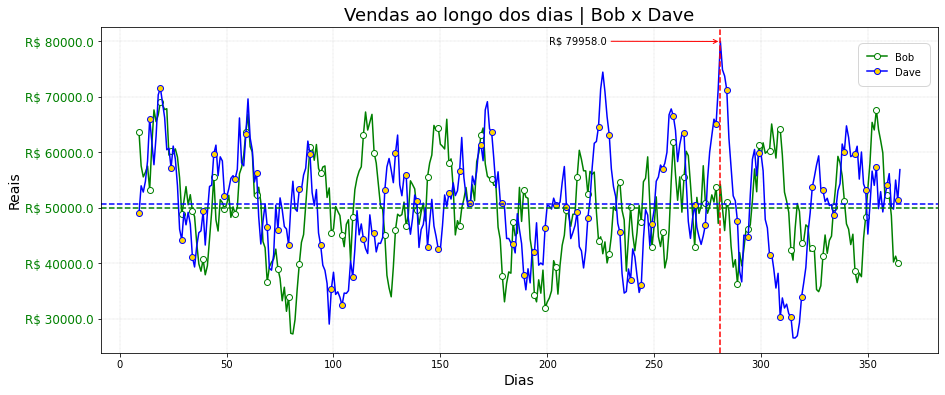

In [19]:
max_annotation = ax.annotate(f"R$ {val_day_max}", # valor gerado para a notação
                             xy=(day_max, val_day_max), # posição para onde a anotação deve apontar
                             xytext=(day_max-80, val_day_max-500), # posição onde  fica o texto da anotação
                             arrowprops=dict(arrowstyle='->', color="r") # estilo da seta
                            )
fig

- Dando ainda mais destaque

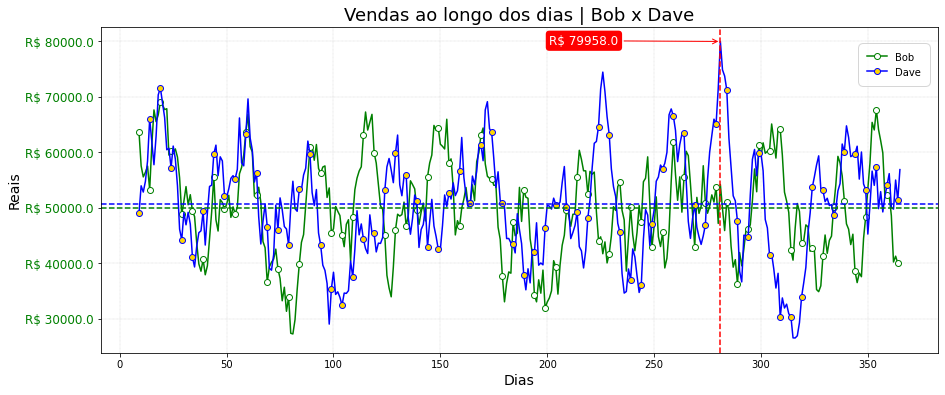

In [20]:
max_annotation.set(size=12, color='w')
max_annotation.set_bbox(dict(facecolor='r', boxstyle='round, pad=0.3', lw=0))
fig

___
## Exercício 2:
- Adicione uma outra legenda no plot que explique o que são as linhas tracejadas azul e verde
___

### Salvando nossa figura

In [21]:
fig.savefig("bob_X_dave.png", dpi=200)

# Extra
- Vale a pena mostrar que o matplotlib e o pandas conversam entre si
- Poderiamos fazer um plot simples de duas formas diferentes

<AxesSubplot:>

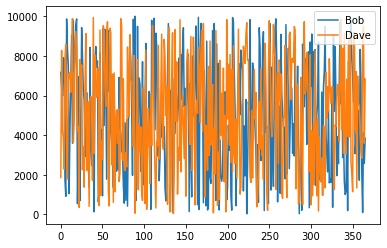

In [22]:
df[['Bob','Dave']].plot.line()

- Se quisermos mais controle
    - Dai poderiamso fazer diversas alterações, uma vez que temos controle sobre o  `Axes`

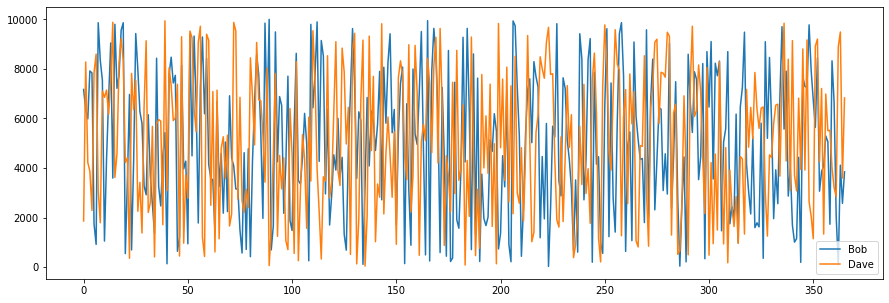

In [23]:
fig2, ax2 = plt.subplots()
df[['Bob','Dave']].plot.line(ax=ax2)
fig2.set_size_inches(15,5)

- Uma outra maneira, seria:

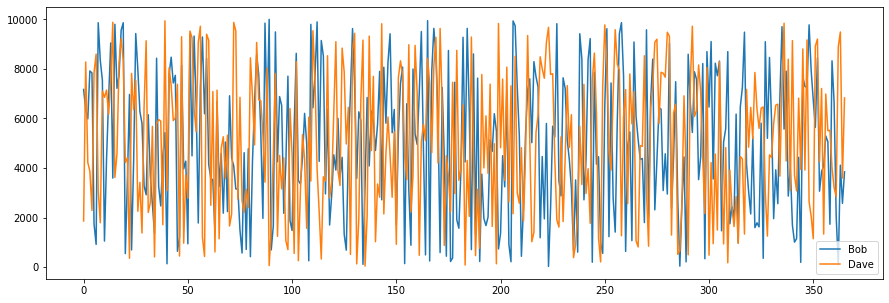

In [27]:
fig3, ax3 = plt.subplots(figsize=(15,5))
ax3.plot('Bob', data=df, label='Bob')
ax3.plot('Dave', data=df, label='Dave')
ax3.legend()

- Veremos mais interações quando falarmos do `seaborn`